<a href="https://colab.research.google.com/github/Sanjay05-coder/State-crime-K-means-clustering/blob/main/State_crime_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler#Why we use standard scaler is because when algo has distance calculation, you need standardize the date , you can refer to KNN notes.
import seaborn as sns


In [23]:
df=pd.read_csv('/content/state_crime.csv')

In [24]:
df

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,1902.6,300.6,1500.9,101.0,222.1,179.8,2.7,...,10.1,11151,1762,8797,592,1302,1054,16,173,59
3111,Wyoming,2016,585501,1957.3,302.5,1518.2,136.6,244.2,195.7,3.4,...,10.1,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,1830.4,275.0,1421.0,134.5,237.5,176.4,2.6,...,13.1,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,1785.1,264.0,1375.9,145.2,212.2,150.6,2.3,...,17.3,10313,1525,7949,839,1226,870,13,243,100


In [25]:
X=df

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'State' column
df['State_Encoded'] = le.fit_transform(df['State'])


In [27]:
df.isnull().sum()

,0
State,0
Year,0
Data.Population,0
Data.Rates.Property.All,0
Data.Rates.Property.Burglary,0
Data.Rates.Property.Larceny,0
Data.Rates.Property.Motor,0
Data.Rates.Violent.All,0
Data.Rates.Violent.Assault,0
Data.Rates.Violent.Murder,0


In [28]:
df.dtypes

,0
State,object
Year,int64
Data.Population,int64
Data.Rates.Property.All,float64
Data.Rates.Property.Burglary,float64
Data.Rates.Property.Larceny,float64
Data.Rates.Property.Motor,float64
Data.Rates.Violent.All,float64
Data.Rates.Violent.Assault,float64
Data.Rates.Violent.Murder,float64


In [30]:
scaler=StandardScaler()

# Select only numerical columns for scaling
numerical_cols = df.select_dtypes(include=np.number).columns
X_numerical = df[numerical_cols]

X_scaled=scaler.fit_transform(X_numerical)

In [33]:
X_scaled

array([[-1.70807051, -0.18372555, -1.76788887, ..., -0.23506389,
        -0.24454489, -1.69725528],
       [-1.65025633, -0.1827199 , -1.80308018, ..., -0.23753983,
        -0.24898648, -1.69725528],
       [-1.59244214, -0.18112272, -1.74560339, ..., -0.24044265,
        -0.24693142, -1.69725528],
       ...,
       [ 1.58733816, -0.26037362, -1.20722573, ..., -0.23660068,
        -0.25816797,  1.69864472],
       [ 1.64515235, -0.26041863, -1.23917295, ..., -0.23830822,
        -0.25777022,  1.69864472],
       [ 1.70296653, -0.26038948, -1.39009359, ..., -0.23139267,
        -0.25831713,  1.69864472]])

In [35]:
# convert the scaled data into a dataframe

df_scaled=pd.DataFrame(X_scaled,columns=numerical_cols)

In [36]:
df_scaled

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,...,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery,State_Encoded
0,-1.708071,-0.183726,-1.767889,-1.166135,-1.927576,-1.153836,-0.734997,-0.623089,1.006336,-1.292831,...,-0.243782,-0.231483,-0.246165,-0.243564,-0.226474,-0.213841,-0.105820,-0.235064,-0.244545,-1.697255
1,-1.650256,-0.182720,-1.803080,-1.203316,-1.952860,-1.201214,-0.797964,-0.680838,1.091290,-1.352741,...,-0.244752,-0.232730,-0.246807,-0.245727,-0.229503,-0.216330,-0.097204,-0.237540,-0.248986,-1.697255
2,-1.592442,-0.181123,-1.745603,-1.181366,-1.880349,-1.171433,-0.836927,-0.742980,0.496609,-1.418641,...,-0.242264,-0.231199,-0.243846,-0.243917,-0.231100,-0.218847,-0.142746,-0.240443,-0.246931,-1.697255
3,-1.534628,-0.181436,-1.686434,-1.119098,-1.825882,-1.138945,-0.748565,-0.597981,0.632536,-1.466568,...,-0.240227,-0.228557,-0.241992,-0.242339,-0.226372,-0.211489,-0.132899,-0.242662,-0.245705,-1.697255
4,-1.476814,-0.179725,-1.539886,-0.918184,-1.713718,-1.060432,-0.642808,-0.466791,0.479618,-1.107113,...,-0.234349,-0.218830,-0.237454,-0.237943,-0.219865,-0.203743,-0.142746,-0.225160,-0.242987,-1.697255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,1.471710,-0.260180,-1.156308,-1.289998,-0.915313,-1.092018,-0.611499,-0.361337,-0.641781,-0.040731,...,-0.260937,-0.260701,-0.258633,-0.258948,-0.253724,-0.247323,-0.265834,-0.244285,-0.258450,1.698645
3111,1.529524,-0.260197,-1.117731,-1.285743,-0.896043,-0.931381,-0.534617,-0.261532,-0.522845,0.288770,...,-0.260703,-0.260674,-0.258525,-0.257533,-0.252996,-0.246432,-0.264193,-0.241553,-0.258450,1.698645
3112,1.587338,-0.260374,-1.207226,-1.347338,-1.004309,-0.940857,-0.557925,-0.382679,-0.658772,0.911825,...,-0.261351,-0.261201,-0.259301,-0.257676,-0.253303,-0.247633,-0.266245,-0.236601,-0.258168,1.698645
3113,1.645152,-0.260419,-1.239173,-1.371976,-1.054544,-0.892576,-0.645939,-0.544626,-0.709745,0.714125,...,-0.261571,-0.261403,-0.259636,-0.257267,-0.254156,-0.249105,-0.267065,-0.238308,-0.257770,1.698645


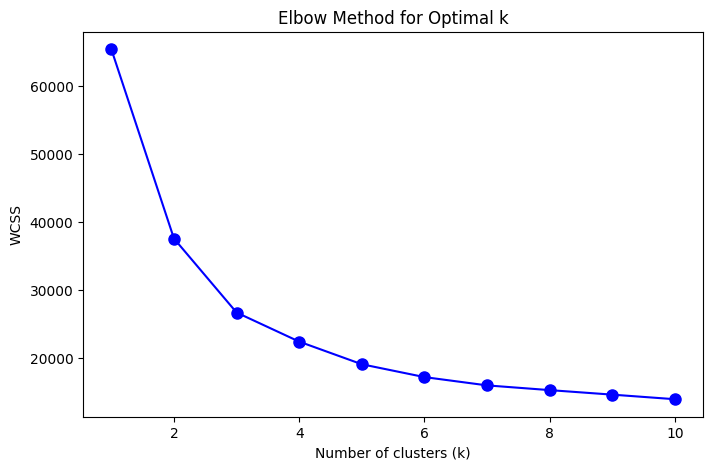

In [37]:
wcss=[] # want to store the wcss values for diffrent k values
k_value=range(1,11) # is a sequence of num frm 1 to 10,representing the potential number of cluste to evaluate

for k in k_value: # looping through the val 1 to 11 to find the best point and represent through the elbow curve and find out
  kmeans = KMeans(n_clusters=k,random_state=42)#KMeans model is created with n_clusters set to k and random_state set to 42 for reproducibility.
  kmeans.fit(X_scaled)#The model is trained using the scaled data
  wcss.append(kmeans.inertia_)#The inertia (WCSS) of the model is calculated and added to the wcss list.

#Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_value,wcss,"bo-",markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# k best is 3

In [38]:
k=3
kmeans=KMeans(n_clusters=k,random_state=42)
kmeans.fit(X_scaled)

#get the cluster labels and centroids
label=kmeans.labels_
centroids=kmeans.cluster_centers_

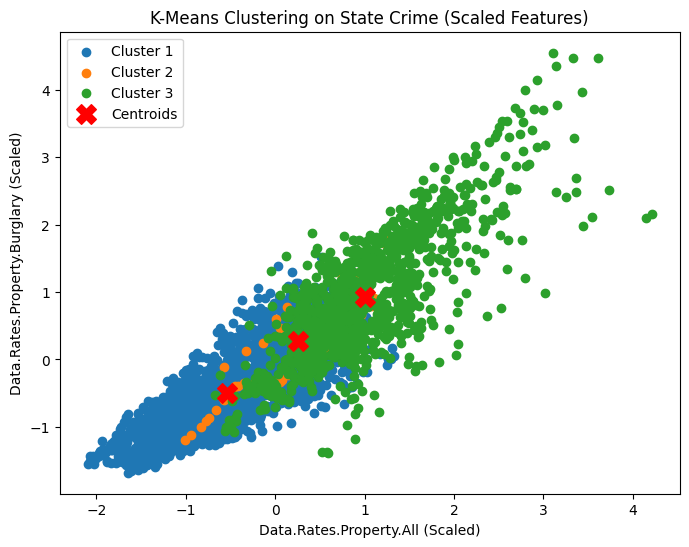

In [46]:
plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X_scaled[label==i, 2], X_scaled[label==i, 3], label=f'Cluster {i+1}')

# Plot centroids using the same feature pair
plt.scatter(centroids[:, 2], centroids[:, 3], s=200, c='red', marker='X', label='Centroids')

plt.legend()
plt.title('K-Means Clustering on State Crime (Scaled Features)')
plt.xlabel('Data.Rates.Property.All (Scaled)')
plt.ylabel('Data.Rates.Property.Burglary (Scaled)')
plt.show()